# Matplotlib图鉴——基础雷达图

## 公众号：可视化图鉴

In [1]:
import matplotlib
print(matplotlib.__version__) #查看Matplotlib版本
import pandas as pd
print(pd.__version__) #查看pandas版本
import numpy as np
print(np.__version__) #查看numpy版本
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = ['STHeiti'] #设置中文

3.3.3
1.2.0
1.19.4


注意，代码在以下环境全部通过测试:
- Python 3.7.1
- Matplotlib == 3.3.2
- pandas == 1.2.0
- numpy == 1.19.2

因版本不同，可能会有部分语法差异，如有报错，请先检查拼写及版本是否一致！

### 基础雷达图 - 四个指标进行对比

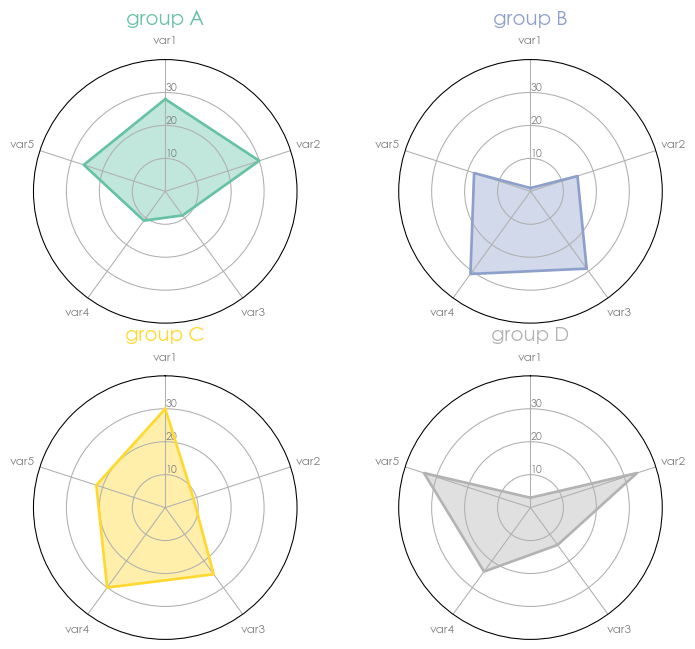

In [17]:

import matplotlib.pyplot as plt
import pandas as pd
from math import pi


df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [28, 1.0, 30, 3],
'var2': [30, 15, 9, 34],
'var3': [9, 29, 25, 14],
'var4': [11, 31, 30, 24],
'var5': [26, 18, 22, 34]
})

# ------- PART 1: Define a function that do a plot for one line of the dataset!

def make_spider( row, title, color):

# number of variable


    categories=list(df)[1:]
    N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

# Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

# If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=9)

# Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=8)
    plt.ylim(0,40)

# Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

# Add a title
    plt.title(title, size=15, color=color, y=1.1)

# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(9, 8), dpi=my_dpi)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))



# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='group '+df['group'][row], color=my_palette(row))

plt.savefig('G_04.png')
plt.show()

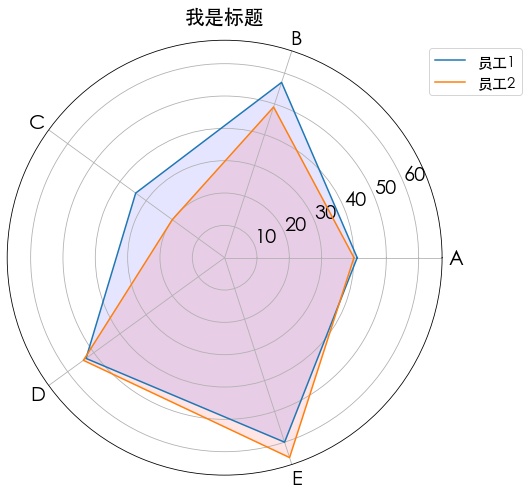